In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [18]:
# Load the dataset
df=pd.read_csv("/content/DoctorAUS.csv")

In [19]:
# Display the first 5 rows of the DataFrame
df.head(5)

,sex,age,income,insurance,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
0,1,0.19,0.55,levyplus,1,4,1,np,1,0,0,0,1,1,0
1,1,0.19,0.45,levyplus,1,2,1,np,1,0,0,0,2,1,1
2,0,0.19,0.90,medlevy,3,0,0,np,1,0,1,4,2,1,1
3,0,0.19,0.15,medlevy,1,0,0,np,1,0,0,0,0,0,0
4,0,0.19,0.45,medlevy,2,5,1,la,1,0,0,0,3,1,2


In [20]:
# Get information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        5190 non-null   int64  
 1   age        5190 non-null   float64
 2   income     5190 non-null   float64
 3   insurance  5190 non-null   object 
 4   illness    5190 non-null   int64  
 5   actdays    5190 non-null   int64  
 6   hscore     5190 non-null   int64  
 7   chcond     5190 non-null   object 
 8   doctorco   5190 non-null   int64  
 9   nondocco   5190 non-null   int64  
 10  hospadmi   5190 non-null   int64  
 11  hospdays   5190 non-null   int64  
 12  medecine   5190 non-null   int64  
 13  prescrib   5190 non-null   int64  
 14  nonpresc   5190 non-null   int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 608.3+ KB


In [21]:
# Check for missing values in each column
df.isnull().sum()

,0
sex,0
age,0
income,0
insurance,0
illness,0
actdays,0
hscore,0
chcond,0
doctorco,0
nondocco,0


In [22]:
# Convert 'insurance' and 'chcond' columns to category dtype
df['insurance'] = df['insurance'].astype('category')
df['chcond'] = df['chcond'].astype('category')
# Convert 'age' and 'income' columns to int64 dtype
df['age'] = df['age'].astype('int64')
df['income'] = df['income'].astype('int64')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        5190 non-null   int64   
 1   age        5190 non-null   int64   
 2   income     5190 non-null   int64   
 3   insurance  5190 non-null   category
 4   illness    5190 non-null   int64   
 5   actdays    5190 non-null   int64   
 6   hscore     5190 non-null   int64   
 7   chcond     5190 non-null   category
 8   doctorco   5190 non-null   int64   
 9   nondocco   5190 non-null   int64   
 10  hospadmi   5190 non-null   int64   
 11  hospdays   5190 non-null   int64   
 12  medecine   5190 non-null   int64   
 13  prescrib   5190 non-null   int64   
 14  nonpresc   5190 non-null   int64   
dtypes: category(2), int64(13)
memory usage: 537.7 KB


In [23]:
# Calculate the sum of specified features
feature_counts = df[['illness', 'actdays', 'hscore', 'doctorco', 'nondocco', 'hospadmi', 'hospdays', 'medecine', 'prescrib', 'nonpresc']].sum()
# Print the feature counts
print(f"Feature Counts:\n{feature_counts}")

Feature Counts:
illness     7432
actdays     4473
hscore      6319
doctorco    1566
nondocco    1114
hospadmi     901
hospdays    6922
medecine    6323
prescrib    4477
nonpresc    1846
dtype: int64


In [24]:
# Define a list of relevant features
relevant_features = ['illness', 'actdays', 'hscore', 'doctorco', 'nondocco', 'hospadmi', 'hospdays', 'medecine', 'prescrib', 'nonpresc']
# Calculate the mean of the relevant features
average_usage_per_user = df[relevant_features].mean()
# Print the average usage per user
print(f"Average Usage per User:\n{average_usage_per_user}")

Average Usage per User:
illness     1.431985
actdays     0.861850
hscore      1.217534
doctorco    0.301734
nondocco    0.214644
hospadmi    0.173603
hospdays    1.333719
medecine    1.218304
prescrib    0.862620
nonpresc    0.355684
dtype: float64


In [25]:
# Group the DataFrame by 'sex' and calculate the mean of relevant features
summary_by_sex = df.groupby('sex')[relevant_features].mean()
# Print the summary grouped by sex
print("Summary grouped by Sex:")
display(summary_by_sex)

Summary grouped by Sex:


,illness,actdays,hscore,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
sex,,,,,,,,,,
0,1.237540,0.738344,1.090434,0.236334,0.138264,0.153939,1.166399,0.783762,0.463826,0.319936
1,1.611029,0.975574,1.334567,0.361954,0.284974,0.191710,1.487787,1.618431,1.229830,0.388601


In [26]:
# Calculate the median values for numerical columns, excluding 'insurance' and 'chcond'
median_values = df.drop(["insurance", "chcond"], axis=1).median()
# Print the median values
print(median_values)

sex         1.0
age         0.0
income      0.0
illness     1.0
actdays     0.0
hscore      0.0
doctorco    0.0
nondocco    0.0
hospadmi    0.0
hospdays    0.0
medecine    1.0
prescrib    0.0
nonpresc    0.0
dtype: float64


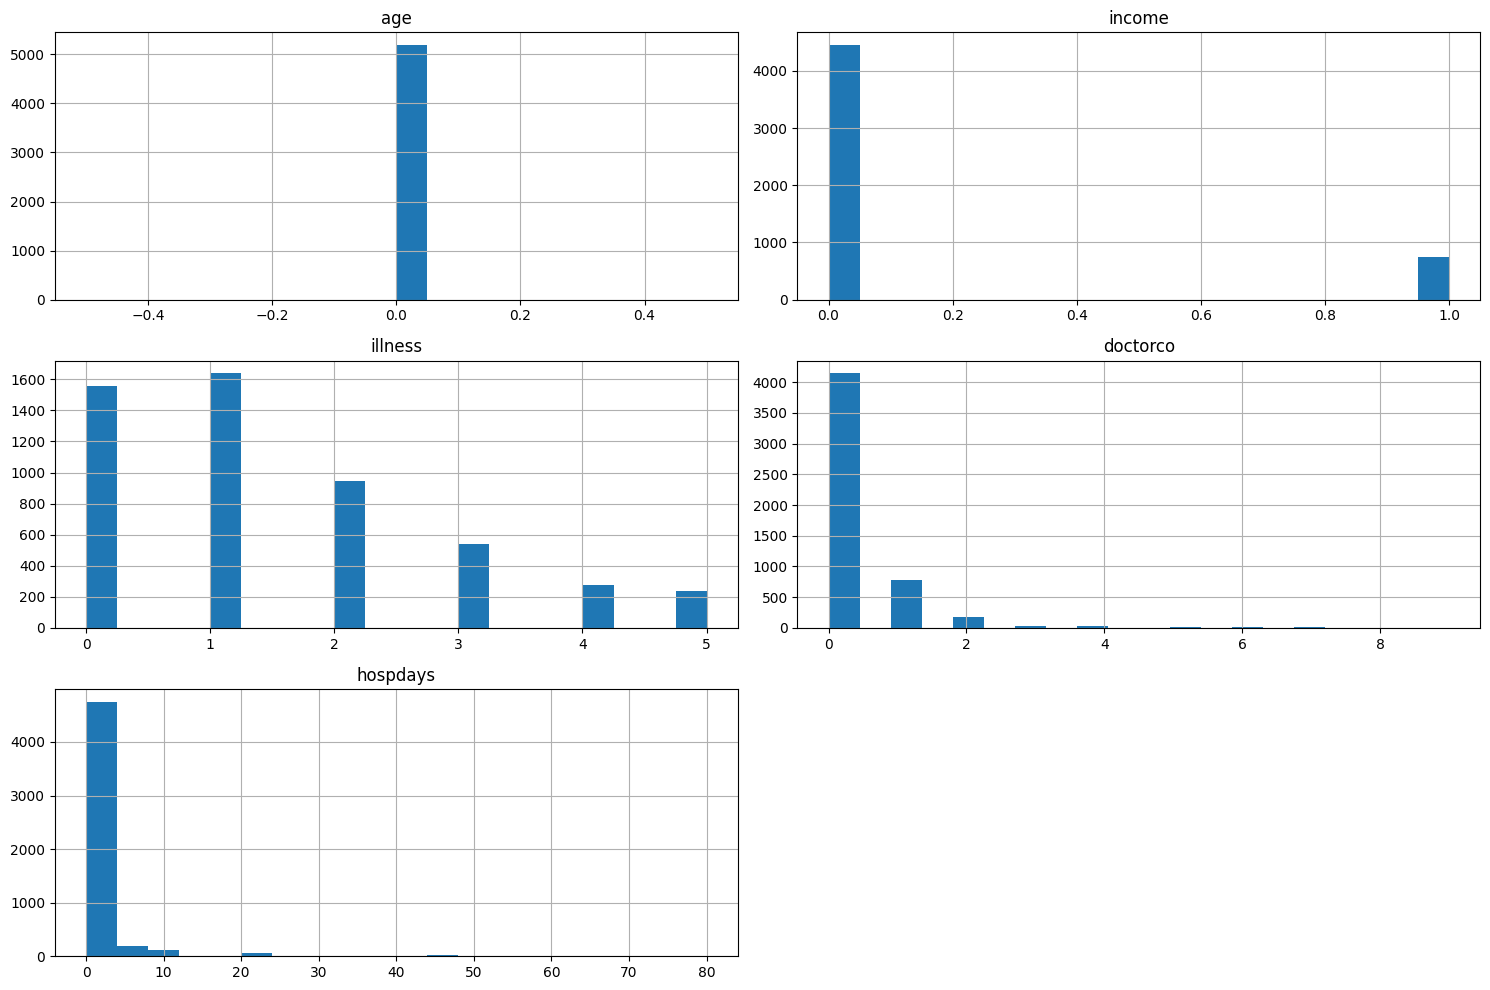

In [27]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Define a list of numerical features for plotting histograms
numerical_features = ['age', 'income', 'illness', 'doctorco', 'hospdays']

# Plot histograms for the numerical features
df[numerical_features].hist(bins=20, figsize=(15, 10))
# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()

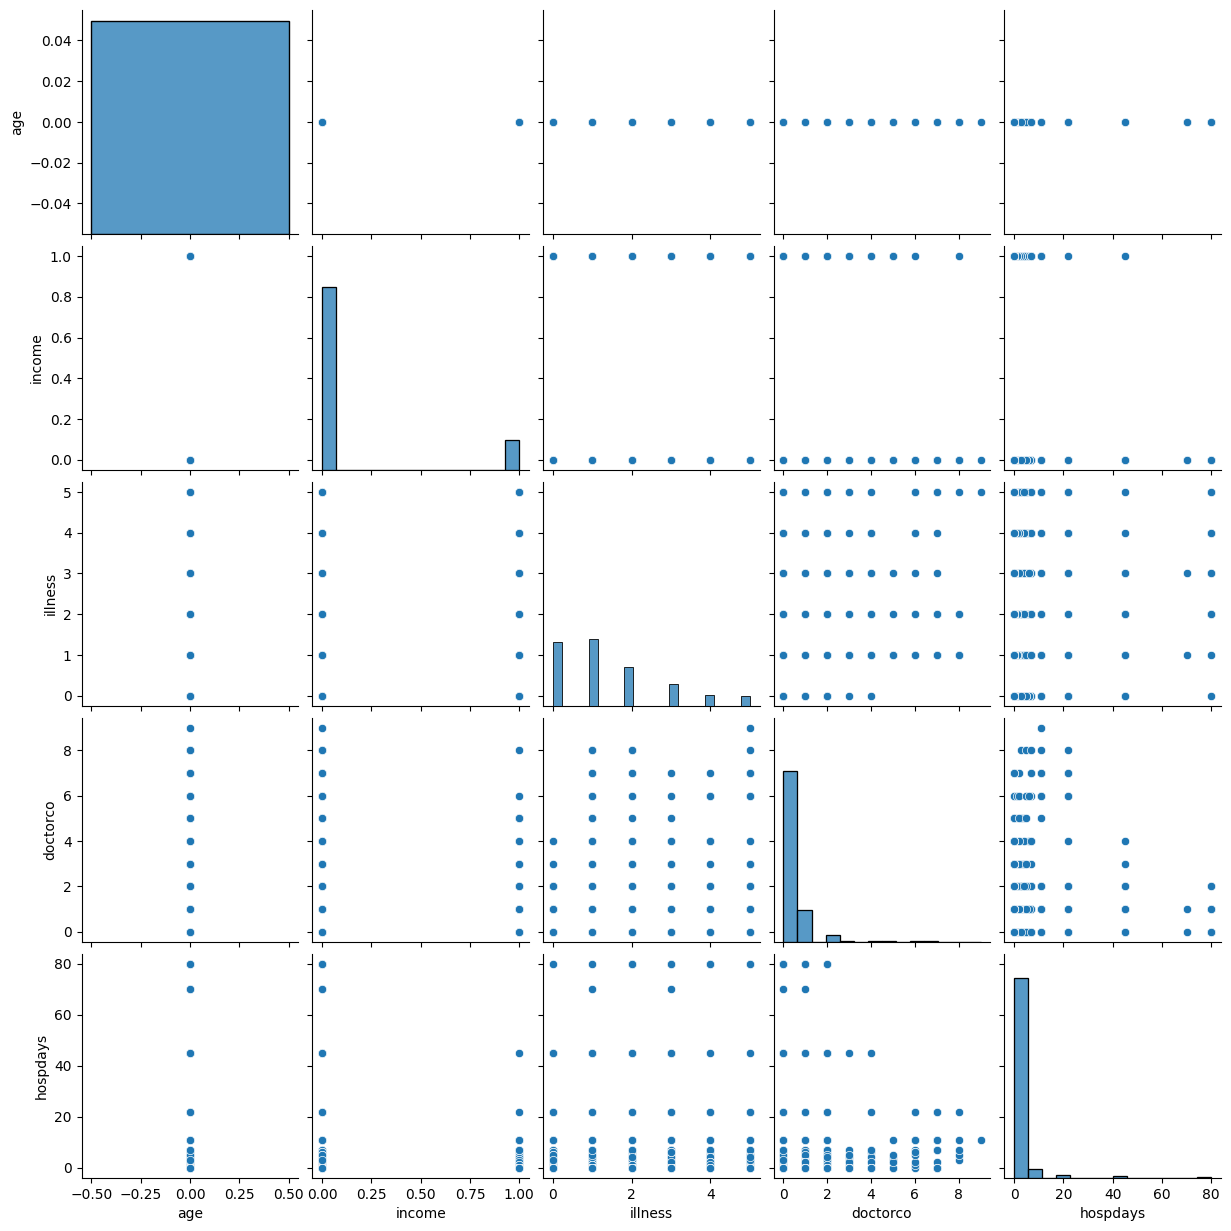

In [28]:
# Import seaborn for enhanced visualizations
import seaborn as sns

# Create a pair plot of the specified numerical features
sns.pairplot(df[numerical_features])
# Display the plot
plt.show()

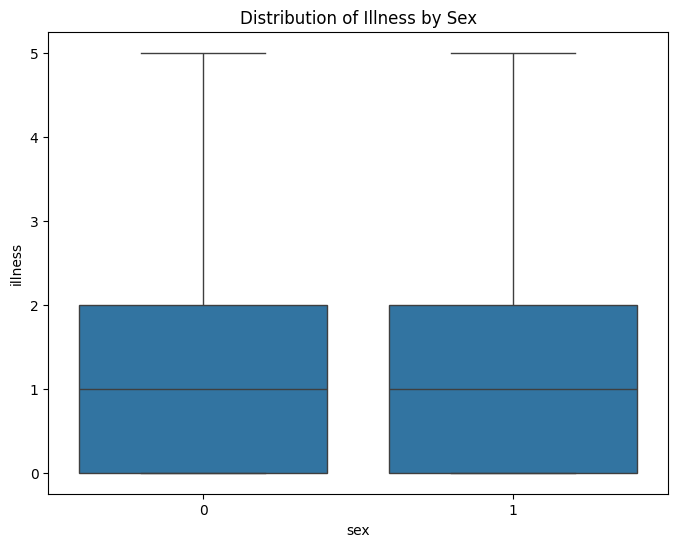

In [29]:
# Create a box plot to show the distribution of 'illness' by 'sex'
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='illness', data=df)
# Add a title to the plot
plt.title('Distribution of Illness by Sex')
# Display the plot
plt.show()